In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean

from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'

hdus = [fits.open(f'{PATH_RAW}{folder}/{folder[:4]}_cdens.fits')[0] for folder in tqdm(os.listdir(PATH_RAW))]

100%|██████████| 163/163 [00:06<00:00, 24.06it/s]


In [3]:
hdu_toward = [hdus[0],hdus[1],hdus[-1]]
wcs_toward, shape_toward = find_optimal_celestial_wcs(hdu_toward,projection='CAR')
array_toward, footprint_toward = reproject_and_coadd(hdu_toward,
                                       wcs_toward, shape_out=shape_toward,
                                       reproject_function=reproject_interp)

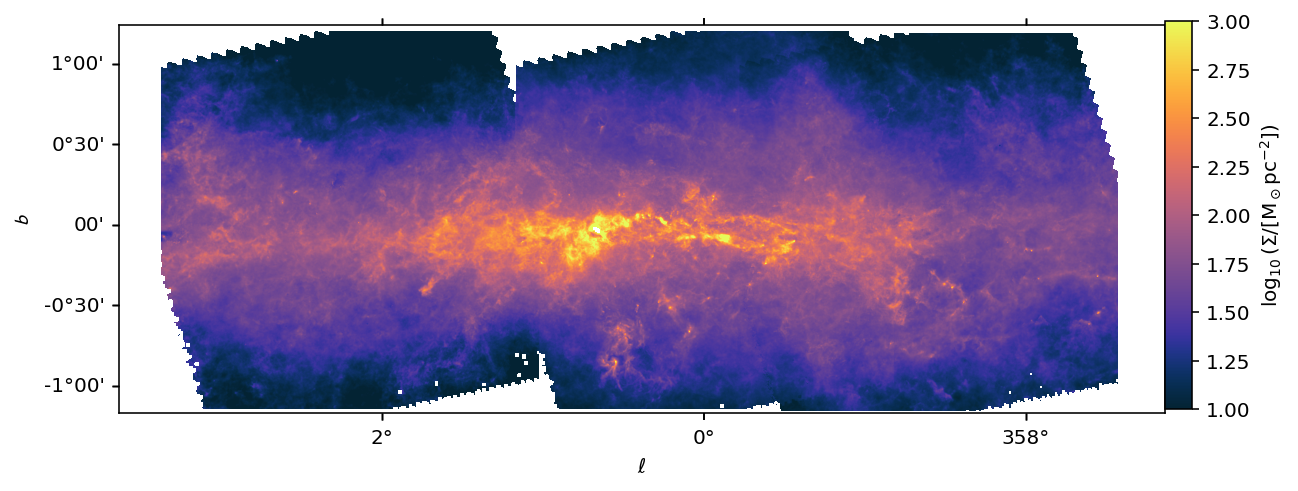

In [6]:
plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)#figsize=(10*2, 8*2))

ax1 = plt.subplot(1,1, 1, projection=wcs_toward)
plt.imshow(np.log10(array_toward/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=1, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\mathcal{b}$')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cax = plt.axes([0.9, 0.143, 0.02, 0.718])
plt.colorbar(cax=cax, label=r'$\log_{10}(\Sigma/ [\mathrm{M}_\odot \mathrm{pc}^{-2}])$')

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/Raw_ColumnDensity_toward.png', bbox_inches="tight")
plt.show()